In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df = pd.read_csv(r"C:\Users\HP'\Downloads\teachingratings.csv")
df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


In [3]:
df.shape

(463, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [5]:
for i in df.columns:
    print(i)

minority
age
gender
credits
beauty
eval
division
native
tenure
students
allstudents
prof
PrimaryLast
vismin
female
single_credit
upper_division
English_speaker
tenured_prof


In [6]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()

minority           0
age                0
gender             0
credits            0
beauty             0
eval               0
division           0
native             0
tenure             0
students           0
allstudents        0
prof               0
PrimaryLast        0
vismin             0
female             0
single_credit      0
upper_division     0
English_speaker    0
tenured_prof       0
dtype: int64

C:\Users\HP'\AppData\Local\Temp\ipykernel_22624\3228052928.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["eval"],
c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Normal distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution Plot')]

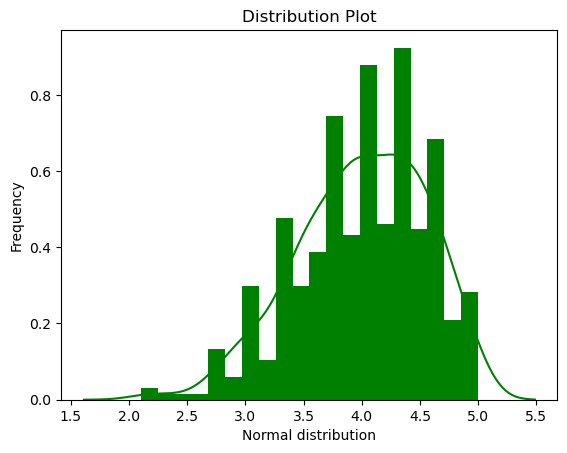

In [8]:
ax = sns.distplot(df["eval"], 
             color="green",
             kde=True,
             bins=20, 
             hist_kws={"linewidth":15, "alpha":1}
             )
ax.set(xlabel="Normal distribution", ylabel="Frequency",title="Distribution Plot")

***Here our evaluation score of the dataset is quite normally distributed. So, we can now do the levene test to know variance significance***
* ***Here we will do the test between evaluation score w.r.t to the gender.***

*Hypothesis statement for levene test*
* Null hypothesis: Variance is equall i.e. hectoscedastic in nature
* Alternate hypothesis: Variance is not equal

In [9]:
scipy.stats.levene(df[df["gender"]=="male"]["eval"], df[df["gender"]=="female"]["eval"], center="mean")

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

<font color='blue'>***Here, we get the p value greater than the significance value (0.05) and hence we can conclude that there is not enough evidence to reject the null hypothesis. So, we can say that there is the equality in the variance of evaluation for the both group male and female.***
* ***We also know that for performing t test and annova test, our sample group should have equal variance***</font>

<font color="red" size=18> ***Now we will be using the t test on the same group of data***</font>

For T test there are two assumptions:
* Both sample group should be normally distributed
* Should have equal variance

Hypothesis statement for t test.
* Null Hypothesis: There is no difference in evaluation of mean based on gender
* Alternate Hyothesis: There is significant difference in the evaluation of mean based on gender

In [10]:
scipy.stats.ttest_ind(df[df["gender"] == "male"]["eval"], df[df["gender"] == "female"]["eval"], equal_var=True)

TtestResult(statistic=3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

<font color="blue">***The p value is much lesser than the significance value i.e. 0.05 and hence we can conclude that there is enough evidemce to reject the null hypothesis. If the null hypothesis is rejected than the alternative hypothesis is true, which states that there is statistically enough evidence of difference in evaluation based on gender***</font>


<font color="red" size=18>***ANNOVA: Using the teacher's rating dataset, does beauty score for instructers differ by age?***</font>

ANNOVA can not work with continous variables so we have generated a new column named "age_group" and using that column, we are going compare the variance based on the category we defined in the age_group i.e. "40 years and younger", "age group between 40 and 57 years", and "age group above 57 years".

In [11]:
df.loc[(df["age"]<= 40), "age_group"] = "40 years and younger"
df.loc[(df["age"]>40)&(df["age"]<57), "age_group"] = "age group between 40 years and 57 years"
df.loc[(df["age"]>=57), "age_group"] = "age group above 57 years"

Hypothesis for levene test
*   Null hypothesis: Variance of the three groups must be equal.
*   Alternate hypothesis: Variance of any one group must not be equal.

In [12]:
scipy.stats.levene(df[df["age_group"] == "40 years and younger"]["beauty"], 
                   df[df["age_group"] == "age group between 40 years and 57 years"]["beauty"], 
                   df[df["age_group"] == "age group above 57 years"]["beauty"],
                   center="mean")

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

<font color="blue">***From the above levene test, we find that the p score is much lesser tha the significance level i.e. 0.05. We can conclude that there is not enough evidence to conclude that the variance of the three groups are equal. Hence, we can reject the null hypothesis and accept the alternate hypothesis, which states that the variance of atleat one group differs from the another.***
* ***Statistically we can not move futher to do the annova test because p value is much lesser than the significance value.***
* ***But for the learning purpose we are moving further to do the annova test***</font>

In [13]:
age_lower_than_40 = df[df["age_group"] == "40 years and younger"]["beauty"]
age_greater_than40_and_less_than_57 = df[df["age_group"] == "age group between 40 years and 57 years"]["beauty"]
age_greater_than_57 = df[df["age_group"] == "age group above 57 years"]["beauty"]

Hypothesis Statement for ANNOVA test:
* Null hypothesis: The mean of beauty scores of all three group are equal.
* Alternate hypothesis: Mean of beauty score of at-least one group is different.

In [14]:
f_statistics, p_values = scipy.stats.f_oneway(age_lower_than_40, age_greater_than40_and_less_than_57, age_greater_than_57)
print("F statistics value is: {}  \nP value is: {}".format(f_statistics, p_values))

F statistics value is: 17.597558611010122  
P value is: 4.3225489816137975e-08


<font color="blue">***From the above F test, we came to know that the p value is much lesser than the significance value and we can conclude that there is enough evidence to reject the null hyposthesis and accept the alternate hypothesis, which says that tha variance of beauty score of at-least one group differs from the others.***</font>

<font color="red" size=06>***ANNOVA: Test of variance for different groups based on age and evaluation score***</font>

First of all, we are going to form the ***hypothesis stament*** for levene test, which is as follows:
* Null hypothesis: The Variance of all 3 groups, based on the age, have equal mean.
* Alternative hypothesis: This hypothesis states that the variance of atleast one group differs from the others.

In [15]:
age_lower_than_40_eval = df[df["age_group"] == "40 years and younger"]["eval"]
age_greater_than40_and_less_than_57_eval = df[df["age_group"] == "age group between 40 years and 57 years"]["eval"]
age_greater_than_57_eval = df[df["age_group"] == "age group above 57 years"]["eval"]

In [16]:
scipy.stats.levene(df[df["age_group"] == "40 years and younger"]["eval"],
                   df[df["age_group"] == "age group between 40 years and 57 years"]["eval"],
                   df[df["age_group"] == "age group above 57 years"]["eval"],
                   center="mean")

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

<font color="blue">***Here from the levene test, we get to know that the p value is lesser than the significance value (0.05) and hence we can conclude that we can reject the null hypothesis, which states that the variance is equal for each group and accept the alternative hypothesis stating that the variance is different for at leat one group***
* ***Here the null hypothesis is rejected and we know that for ANNOVA test, we assume that the varaince of the group must be same. But in this case the variance of atleat one group differs from the another.***
* ***But for study purpose, we are moving along otherwise there is no need to move forward to do annova test.***</font>

*Hypothesis staement for ANNOVA test*
* Null hypothesis: The mean of evaluation scores based on the different age groups.
* Alternative hypothesis: The mean of evaluation of at leat one group differs from the others.

In [17]:
f_statistics, p_values = scipy.stats.f_oneway(age_greater_than_57_eval, age_greater_than40_and_less_than_57_eval, age_greater_than_57_eval)
print("F statistic: {}\nP Values: {}".format(f_statistics, p_values))

F statistic: 1.628656228247307
P Values: 0.1973006475306491


<font color="blue">***From the above test, we can see that the p values is greater than the significance level i.e. (0.05) so we can conclude  that there is not enough evidence to reject the null hypothesis, which states that the mean of evaluation scores are same for all the groups.***</font>

<font color="red" size=18>***Chi Square test: Using the teachers' rating data set, is there an association between tenure and gender?***</font>

*Hypothesis Statement*
* Null hypothesis: The proportion of teachers who are tenured is independent of gender.
* Alternative hypothesis: The proportion of teachers who are tenured is associated with gender.

In [18]:
cont_table = pd.crosstab(df["tenure"], df["gender"])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [19]:
scipy.stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=2.20678166999886, pvalue=0.1374050603563787, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

<font color="blue">***Here, we came to know that p score is greater than the significance value i.e. (0.05). Hence we can conclude that there is not enough evidence to reject the null hypothesis, which states that the proportion of teachers who are tenured is independent of gender.***</font>

<font color="red" size=18>***Correlation: Using the teachers rating dataset, Is teaching  evaluation  score correlated with  beauty score?***</font>

Hypothesis Statement for correlation:
-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


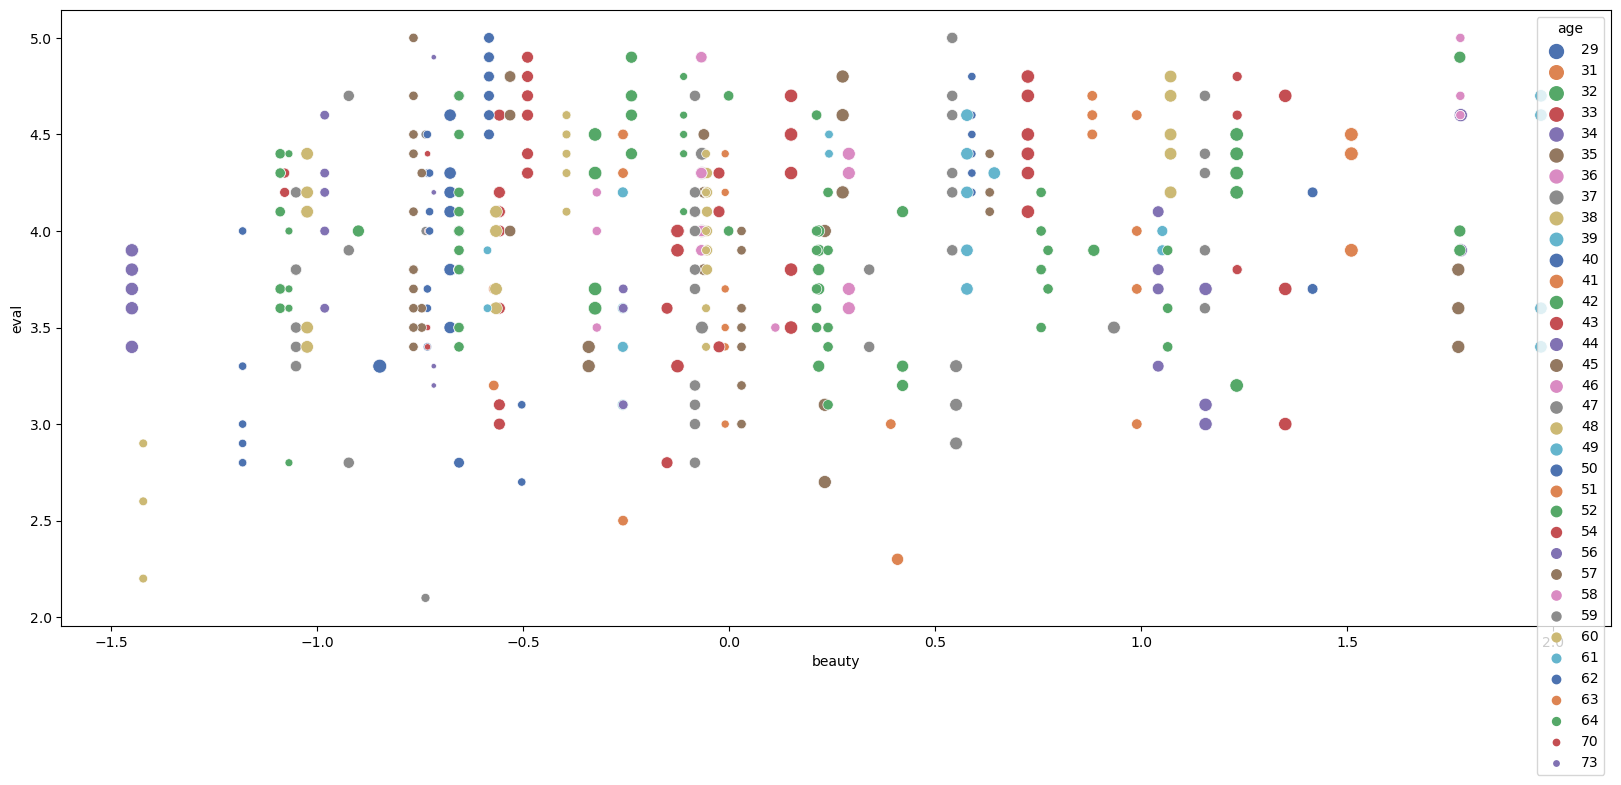

In [20]:
plt.figure(figsize=(20,8))
sns.scatterplot(x="beauty", 
                y="eval", 
                data=df, 
                hue="age",
                alpha=1, 
                palette="deep",
                size="age",
                legend="full",
                sizes=(100,15))
plt.show()

In [21]:
scipy.stats.pearsonr(df["beauty"], df["eval"])

PearsonRResult(statistic=0.1890390908404521, pvalue=4.247115419813754e-05)

<font color="blue">***Here we observed that the p-value is much lesser than the significance level and hence we can conclude that there is enough evidence to reject the null hypothesis, which states that evaluation and beauty scores are not correlated.***</font>

<font color="red" size=18>***Using the teachers rating data set, does tenure affect teaching evaluation scores?***</font>

<font color="blue">***Before doing any test, we need to know the variance of both the groups. So, we will be doing the levene test for the confirmation of variance***</font>

Hypothesis statement:
* Null hypothesis: The variance of both the groups must be equal.
* Alternative hypothesis: The variance of the groups are not equal.

In [23]:
scipy.stats.levene(df[df["tenure"] == "yes"]["eval"],
                   df[df["tenure"]=="no"]["eval"],
                   center="mean")

LeveneResult(statistic=0.44389295824627134, pvalue=0.5055827160360271)

<font color="blue">***From the above test, we came to know that the p value is greater than the significance level i.e. 0.05 so we can colclude that there is not enough evidence to reject the null hypothesis and hence the variance of both the group is same.***</font>

<font color="blue">***We are now going to test the above groups with t test beacuse there are only two groups***</font>

Hypothesis Statement:
* Null hypothesis: Tenure is not affecting the teaching evaluation scores.
* Alternative hypothesis: Tenure is affecting the teaching evaluation scores

In [24]:
scipy.stats.ttest_ind(df[df["tenure"] == "yes"]["eval"],
                   df[df["tenure"]=="no"]["eval"]
                   )

TtestResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792, df=461.0)

<font color="blue">***From the above perfromed t test, we can say that the p value is much lesser than the significance level i.e. 0.05 so we can conclude that there is enough evidence to reject the null hypothesis, which says that the tenure is not affecting the teaching evaluation score. The alternative hypothesis is the true hypothesis, which states that the tenure is affecting the teaching evaluation score.***</font>

<font color="red" size=18>***Using the teachers rating data set, is there an association between age and tenure?***</font>

Hypothesis Statement:
* Null hypothesis: There is no association between age and tenure.
* Alternative hypothesis: There is association between age and tenure.

In [27]:
cont_table=pd.crosstab(df["age_group"],df["tenure"])
cont_table

tenure,no,yes
age_group,,
40 years and younger,15,98
age group above 57 years,25,97
age group between 40 years and 57 years,62,166


In [28]:
scipy.stats.chi2_contingency(cont_table, correction=True)

Chi2ContingencyResult(statistic=8.749576239010711, pvalue=0.012590809706820843, dof=2, expected_freq=array([[ 24.89416847,  88.10583153],
       [ 26.87688985,  95.12311015],
       [ 50.22894168, 177.77105832]]))

<font color="blue">***From the above chi-squared test, we get the p value lesser than the significance level so we can conclude that there is enough evidence to reject the null hypothesis, which satates that there isi no association between age and tenure. Hence the alternative hypothesis is the true hypothesis, which states that there is significant association between age and tenure.***</font>